In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
import scipy.special as spe
from scipy.optimize import fsolve

In [67]:
def continuidad(x, l, rho):
    y=rho*np.sqrt(x+1)
    z=rho*np.sqrt(-x)
    g=np.sqrt(x+1)*spe.spherical_jn(l,y,derivative=True)/spe.spherical_jn(l,y)
    h=np.sqrt(-x)*spe.spherical_kn(l,z,derivative=True)/spe.spherical_kn(l,z)
    f=g-h
    return f

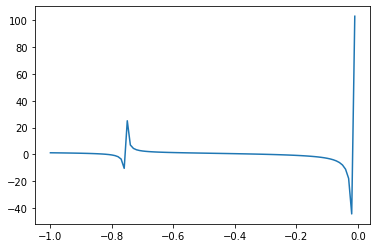

In [68]:
plt.figure()
x=np.arange(-1,0,0.01)
plt.plot(x, continuidad(x, 0, np.sqrt(40)))

In [38]:
from sympy import *
x=Symbol('x')
ans=solve(continuidad(x,0,np.sqrt(40)))
print(ans)

ModuleNotFoundError: No module named 'sympy'

In [70]:
def hallarCeros(f,l, rho,toi=10**-4.7):
    g=np.arange(-1,0, 0.00001)
    ceros=[]
    for i in range(len(g)):
        if np.abs(f(g[i],l,rho))<toi:
            ceros.append(np.round(g[i],3))       
    zeros=np.unique(ceros) 
    return zeros
hallarCeros(continuidad, 0, np.sqrt(40))

array([-0.818, -0.3  ])

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


[0. 0. 2. 3.] [0.3   0.818 0.399 0.131]
[0. 1. 2. 3. 4.] [0.414 0.14  0.501 0.274 0.018]
[0. 0. 3. 4.] [0.497 0.872 0.376 0.153]
[0. 1. 2. 3. 4. 5.] [0.062 0.342 0.107 0.454 0.256 0.036]
[2. 3.] [0.197 0.514]


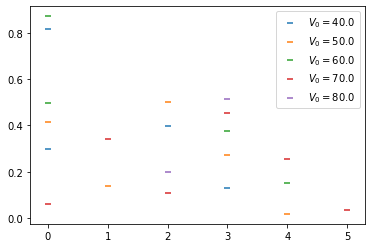

In [50]:
plt.figure()
rho=np.sqrt(np.arange(40,90,10))
l=np.arange(0,6,1)
energy=np.zeros((len(rho), len(l)))
for i in range(len(rho)):
    y=hallarCeros(continuidad, l[0], rho[i])
    x=np.ones(len(y))*l[0]
    for j in range(1,len(l)):
        a=hallarCeros(continuidad, l[j], rho[i])
        y=np.concatenate((y,a))
        x=np.concatenate((x,np.ones(len(a))*l[j]))
    print(x,y)
    plt.scatter(x,y, marker="_", label=r"$V_0=${}".format(round(rho[i]**2, 0)))
plt.legend()        

In [31]:
np.concatenate?

Docstring:
concatenate((a1, a2, ...), axis=0, out=None)

Join a sequence of arrays along an existing axis.

Parameters
----------
a1, a2, ... : sequence of array_like
    The arrays must have the same shape, except in the dimension
    corresponding to `axis` (the first, by default).
axis : int, optional
    The axis along which the arrays will be joined.  If axis is None,
    arrays are flattened before use.  Default is 0.
out : ndarray, optional
    If provided, the destination to place the result. The shape must be
    correct, matching that of what concatenate would have returned if no
    out argument were specified.

Returns
-------
res : ndarray
    The concatenated array.

See Also
--------
ma.concatenate : Concatenate function that preserves input masks.
array_split : Split an array into multiple sub-arrays of equal or
              near-equal size.
split : Split array into a list of multiple sub-arrays of equal size.
hsplit : Split array into multiple sub-arrays horizontally 

In [51]:
def bisection(a,b,f,l, rho,toi=1E-6):
    xl=a
    xr=b
    while(np.abs(xl-xr)>=toi):
        c=(xl+xr)/2.0
        prod=f(xl, l,rho)*f(c, l, rho)
        if prod>toi:
            xl=c
        else:
            if prod<toi:
                xr=c
    return c            

In [ ]:
bisection(-0.999,0, continuidad, 6, 10)

In [ ]:
rho=np.sqrt(np.arange(10,100,10))
l=np.arange(0,11,1)
energias=np.zeros((len(rho), len(l)))

In [ ]:
for i in range(len(rho)):
    for j in range(len(l)):
        energias[i][j]=bisection(-0.99999,0, continuidad, l[j], rho[i])
energias

In [ ]:
energias[1]

In [ ]:
plt.plot(l, energias[1])

In [ ]:
energias[:,1]

In [ ]:
plt.plot(rho, energias[:,0])

In [ ]:
def aproximada(x, l, rho):
    y=np.tan(rho*np.sqrt(1+x)-np.pi*l/2.0)+np.sqrt(1+x/(-x))
    return y

In [ ]:
plt.figure()
plt.plot(x, aproximada(x,6,40))

In [6]:
def tanDl(x, l, rho):
    y=rho*np.sqrt(x+1)
    z=rho*np.sqrt(x)
    g=y*spe.spherical_jn(l,z)*spe.spherical_jn(l,y, derivative=True)-z*spe.spherical_jn(l,z, derivative=True)*spe.spherical_jn(l,y)
    h=z*spe.spherical_yn(l,z, derivative=True)*spe.spherical_jn(l,y)-y*spe.spherical_jn(l,y,derivative=True)*spe.spherical_yn(l,z)
    f=-g/h
    return f
    

In [7]:
def sigma(x, rho):
    s=0
    for i in range(10):
        d=tanDl(x,i,rho)
        s+=4*np.pi*(2*i+1)*d**2/((rho**2*x)*(1+d**2))
    return s

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


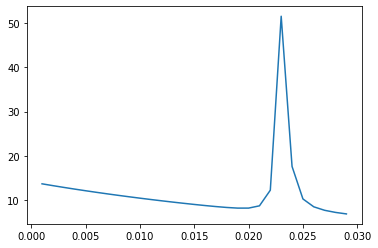

In [66]:
x=np.arange(0,0.03,0.001)
plt.figure()
plt.plot(x, sigma(x,np.sqrt(80)))

In [18]:
tanDl(x,0,10)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


array([            nan, -1.33617790e+00, -3.63962773e+00,  8.72974277e+01,
        4.08496252e+00,  2.15443609e+00,  1.45117010e+00,  1.07056057e+00,
        8.24317002e-01,  6.48550058e-01,  5.15752207e-01,  4.12329366e-01,
        3.30963725e-01,  2.67457476e-01,  2.19196077e-01,  1.84277389e-01,
        1.60961640e-01,  1.47329712e-01,  1.41130120e-01,  1.39813327e-01,
        1.40722729e-01,  1.41367010e-01,  1.39675627e-01,  1.34157877e-01,
        1.23935418e-01,  1.08667983e-01,  8.84190023e-02,  6.35081728e-02,
        3.43827835e-02,  1.52161973e-03, -3.46278660e-02, -7.36851915e-02,
       -1.15353266e-01, -1.59422821e-01, -2.05770378e-01, -2.54353528e-01,
       -3.05205935e-01, -3.58433497e-01, -4.14212517e-01, -4.72790422e-01,
       -5.34489461e-01, -5.99713840e-01, -6.68960928e-01, -7.42837438e-01,
       -8.22081908e-01, -9.07595458e-01, -1.00048371e+00, -1.10211417e+00,
       -1.21419566e+00, -1.33888964e+00, -1.47896925e+00, -1.63805125e+00,
       -1.82094278e+00, -

In [22]:
x

array([0.9999])